In [1]:
#!/usr/bin/env python

In [2]:
import os
import sys
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [3]:
import wuml 

In [4]:
data = wuml.make_classification_data( n_samples=200, n_features=5, n_informative=3)
cf = wuml.classification(data, classifier='GP')
wuml.jupyter_print('Running a single classifier')
wuml.jupyter_print(cf)

 classifier  Train
         GP  0.955


In [5]:
wuml.jupyter_print('\n\nSorted Feature Importance')
cf.output_sorted_feature_importance_table(data.columns)

,Coefficients
0,0.383
1,0.284
4,0.246
3,0.033
2,0.023


,Coefficients
0,0.383
1,0.284
4,0.246
3,0.033
2,0.023


In [6]:
wuml.jupyter_print('\n\nRun all classifiers sorted by Accuracy')
models = wuml.run_every_classifier(data, y=data.Y, order_by='Test')
wuml.jupyter_print(models['Train/Test Summary'])

,classifier,Train,Test
,GP,0.95,0.95
,NeuralNet,0.95,0.95
,KNN,0.9056,0.95
,SVM,0.9,0.95
,IKDR,0.8833,0.95
,RandomForest,0.8889,0.8
,NaiveBayes,0.7,0.7
,LDA,0.6944,0.55


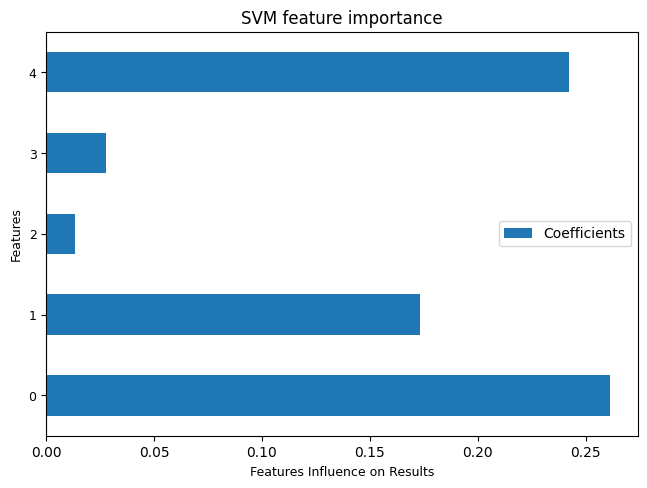

In [7]:
wuml.jupyter_print('\n\nPick out SVM and plot Feature Importance')
models['SVM'].plot_feature_importance('SVM feature importance', data.columns)